## Load Dataset 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as scikit_learn

In [6]:
csv_path = "/Users/saifmohammed/Desktop/DiabetIQ/ML/Test/Copy Dataset/Diabetes_Final_Data_V20.csv"
df = pd.read_csv(csv_path)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [8]:
df.shape

(5437, 15)

In [10]:
df.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

In [12]:
df[df.duplicated()]

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic


## Outliers

<Axes: xlabel='age'>

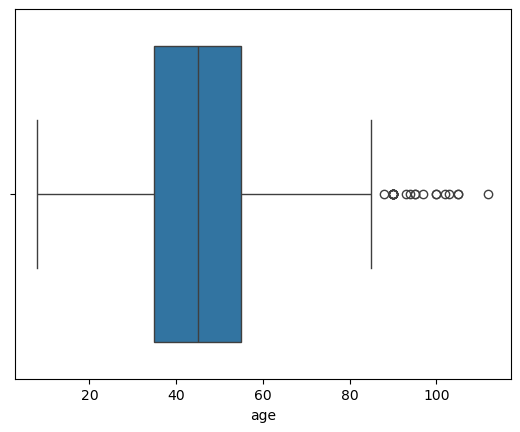

In [15]:
sns.boxplot(x=df['age'])

In [17]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter the outlier values in the 'age' column
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Display the outlier values
outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
360,90,Female,60,222,111,7.58,1.60,58.2,22.73,0,1,0,0,0,No
404,90,Male,68,180,76,8.44,1.65,70.3,25.79,0,1,0,1,0,No
487,97,Male,121,143,88,8.68,1.55,49.4,20.58,0,0,0,0,0,No
633,94,Female,81,187,86,5.12,1.32,24.5,14.04,0,0,0,0,0,No
713,105,Male,78,160,85,9.77,1.63,45.0,17.03,0,0,0,0,0,No
768,90,Male,63,132,59,7.77,1.52,48.0,20.67,0,0,0,0,0,No
887,90,Male,93,179,95,6.40,1.47,25.5,11.75,0,0,0,0,0,No
1250,95,Male,71,148,75,7.20,1.60,65.8,25.70,0,0,0,0,0,No
1769,105,Female,90,153,77,8.64,1.47,36.0,16.59,0,0,0,0,0,No
1862,93,Male,79,110,67,8.32,1.65,58.0,21.28,0,0,0,0,0,No


In [19]:
# Filter the non-outlier values in the 'age' column
non_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Display the non-outlier values
non_outliers# Filter the non-outlier values in the 'age' column
non_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Display the non-outlier values
non_outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [21]:
non_outliers.shape

(5414, 15)

<Axes: xlabel='age'>

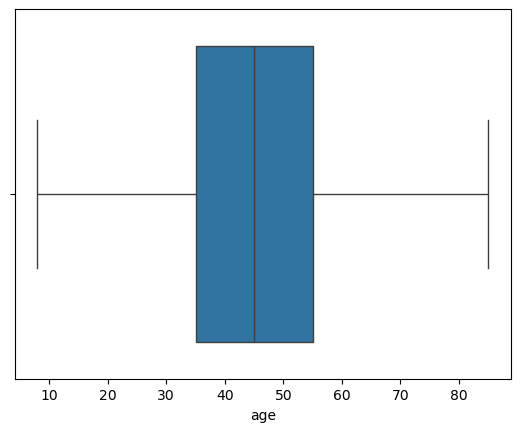

In [23]:
df = non_outliers
sns.boxplot(x=df['age'])

In [25]:
df['diabetic'].value_counts()

diabetic
No     5070
Yes     344
Name: count, dtype: int64

In [27]:
df['gender'].value_counts()

gender
Female    3849
Male      1565
Name: count, dtype: int64

## Categorical Data Handling

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5414 non-null   int64  
 1   gender                  5414 non-null   object 
 2   pulse_rate              5414 non-null   int64  
 3   systolic_bp             5414 non-null   int64  
 4   diastolic_bp            5414 non-null   int64  
 5   glucose                 5414 non-null   float64
 6   height                  5414 non-null   float64
 7   weight                  5414 non-null   float64
 8   bmi                     5414 non-null   float64
 9   family_diabetes         5414 non-null   int64  
 10  hypertensive            5414 non-null   int64  
 11  family_hypertension     5414 non-null   int64  
 12  cardiovascular_disease  5414 non-null   int64  
 13  stroke                  5414 non-null   int64  
 14  diabetic                5414 non-null   objec

In [32]:
# Ensure you're modifying the original dataframe
df = df.copy()

df['gender'] = df['gender'].astype('category')
df['diabetic'] = df['diabetic'].astype('category')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     5414 non-null   int64   
 1   gender                  5414 non-null   category
 2   pulse_rate              5414 non-null   int64   
 3   systolic_bp             5414 non-null   int64   
 4   diastolic_bp            5414 non-null   int64   
 5   glucose                 5414 non-null   float64 
 6   height                  5414 non-null   float64 
 7   weight                  5414 non-null   float64 
 8   bmi                     5414 non-null   float64 
 9   family_diabetes         5414 non-null   int64   
 10  hypertensive            5414 non-null   int64   
 11  family_hypertension     5414 non-null   int64   
 12  cardiovascular_disease  5414 non-null   int64   
 13  stroke                  5414 non-null   int64   
 14  diabetic                5414 

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['diabetic'] = le.fit_transform(df['diabetic'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5414 non-null   int64  
 1   gender                  5414 non-null   int64  
 2   pulse_rate              5414 non-null   int64  
 3   systolic_bp             5414 non-null   int64  
 4   diastolic_bp            5414 non-null   int64  
 5   glucose                 5414 non-null   float64
 6   height                  5414 non-null   float64
 7   weight                  5414 non-null   float64
 8   bmi                     5414 non-null   float64
 9   family_diabetes         5414 non-null   int64  
 10  hypertensive            5414 non-null   int64  
 11  family_hypertension     5414 non-null   int64  
 12  cardiovascular_disease  5414 non-null   int64  
 13  stroke                  5414 non-null   int64  
 14  diabetic                5414 non-null   int64

In [40]:
from sklearn.utils import shuffle
df = shuffle(df)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
3609,60,1,65,130,66,9.46,1.55,46.7,19.45,0,0,0,0,0,0
411,48,0,90,98,76,6.82,1.52,47.0,20.24,0,0,0,0,0,0
4754,30,1,54,112,74,7.98,1.52,48.0,20.67,1,0,1,0,0,0
3673,56,1,67,133,98,6.45,1.65,63.2,23.19,0,1,0,0,0,0
2597,30,0,88,185,108,2.77,1.50,60.6,26.98,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,45,1,76,133,72,10.62,1.52,42.0,18.08,0,0,0,0,0,0
810,40,1,65,143,98,5.65,1.60,69.6,27.18,0,0,0,0,0,0
1559,45,0,72,115,77,6.93,1.57,49.9,20.12,0,0,0,0,0,0
4793,26,0,63,124,82,6.05,1.55,52.0,21.66,0,0,0,0,0,0


In [42]:
df = df.reset_index()
df

,index,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,3609,60,1,65,130,66,9.46,1.55,46.7,19.45,0,0,0,0,0,0
1,411,48,0,90,98,76,6.82,1.52,47.0,20.24,0,0,0,0,0,0
2,4754,30,1,54,112,74,7.98,1.52,48.0,20.67,1,0,1,0,0,0
3,3673,56,1,67,133,98,6.45,1.65,63.2,23.19,0,1,0,0,0,0
4,2597,30,0,88,185,108,2.77,1.50,60.6,26.98,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,1158,45,1,76,133,72,10.62,1.52,42.0,18.08,0,0,0,0,0,0
5410,810,40,1,65,143,98,5.65,1.60,69.6,27.18,0,0,0,0,0,0
5411,1559,45,0,72,115,77,6.93,1.57,49.9,20.12,0,0,0,0,0,0
5412,4793,26,0,63,124,82,6.05,1.55,52.0,21.66,0,0,0,0,0,0


In [44]:
x = df.drop('diabetic', axis=1)
y = df['diabetic']

In [46]:
x.columns

Index(['index', 'age', 'gender', 'pulse_rate', 'systolic_bp', 'diastolic_bp',
       'glucose', 'height', 'weight', 'bmi', 'family_diabetes', 'hypertensive',
       'family_hypertension', 'cardiovascular_disease', 'stroke'],
      dtype='object')

In [48]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5409    0
5410    0
5411    0
5412    0
5413    1
Name: diabetic, Length: 5414, dtype: int64

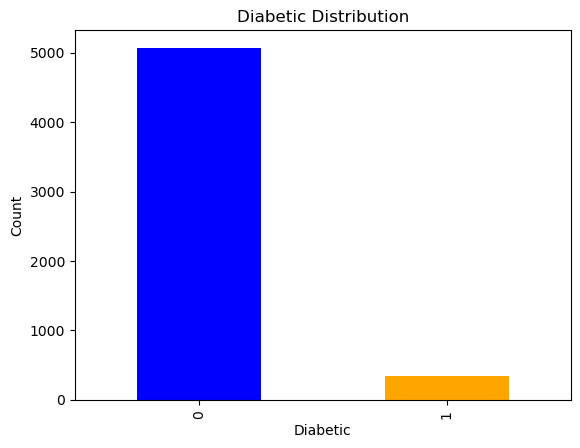

In [50]:
y.value_counts().plot(kind = 'bar', color = ['blue', 'orange']) 
plt.title('Diabetic Distribution')
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.show()

In [52]:
class_counts = y.value_counts()
class_counts

diabetic
0    5070
1     344
Name: count, dtype: int64

In [54]:
# Calculate total count
total = class_counts.sum()

# Calculate percentages
percentages = (class_counts / total) * 100
percentages

diabetic
0    93.646103
1     6.353897
Name: count, dtype: float64

## Train & Test Data Spliting 

In [57]:
from sklearn.model_selection import train_test_split

# Split the data with stratified sampling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("x_train data size", len(x_train))
print("y_train data size", len(y_train))
print("x_test data size", len(x_test))
print("y_test data size", len(y_test))

x_train data size 4331
y_train data size 4331
x_test data size 1083
y_test data size 1083


## Standard Normal Distribution

In [60]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
std_scaler = StandardScaler()
std_scaled_x_train = std_scaler.fit_transform(x_train)
std_scaled_x_test = std_scaler.transform(x_test)

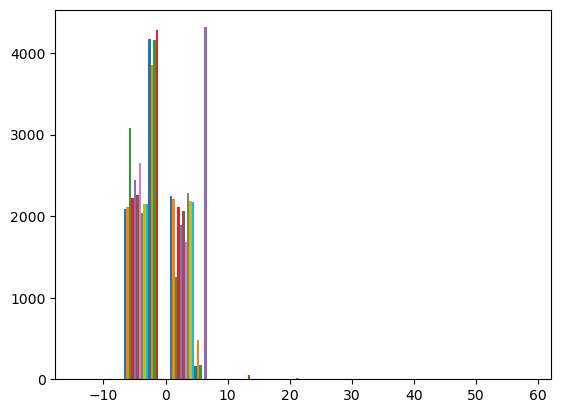

In [62]:
plt.hist(std_scaled_x_train)
plt.show()

## Imbalance Data Handling with Synthetic Minority Over-Sampling Technique (SMOTE)

In [65]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy=0.7, random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(std_scaled_x_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({0: 4056, 1: 2839})


In [67]:
class_counts = y_train_resampled.value_counts()
class_counts

diabetic
0    4056
1    2839
Name: count, dtype: int64

In [69]:
# Calculate total count
total = class_counts.sum()

# Calculate percentages
percentages = (class_counts / total) * 100
percentages

diabetic
0    58.825236
1    41.174764
Name: count, dtype: float64

## Decision Tree

In [72]:
from sklearn import tree

# Train the decision tree classifier
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [74]:
# Predict on the test set
dt_pred = dt_clf.predict(std_scaled_x_test)
dt_pred

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

cm = confusion_matrix(y_test, dt_pred)
cm

array([[913, 101],
       [ 41,  28]])

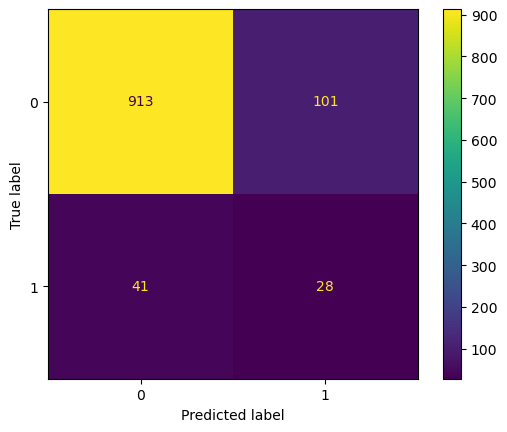

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [80]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.87
Precision: 0.22
F1: 0.28
Recall: 0.41


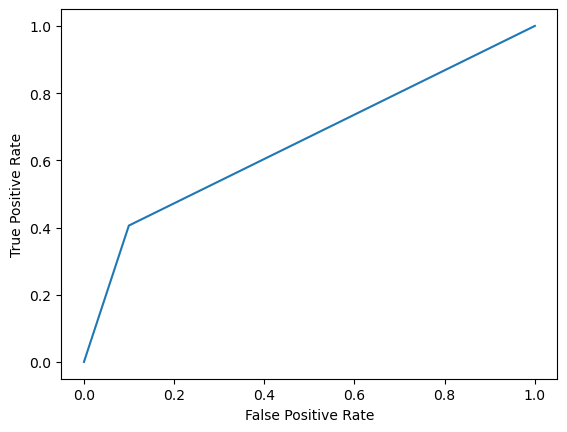

In [82]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, dt_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [84]:
from sklearn.metrics import auc

auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.65


## Hyperparameter Tuning (Dicision Tree)

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 50, 100],
    'min_samples_split': [5, 10, 15, 20, 25]
}
dt_clf = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100],
                         'min_samples_split': [5, 10, 15, 20, 25]},
             verbose=2)

In [88]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 100, 'min_samples_split': 5}


In [89]:
best_dt_clf = grid_search.best_estimator_
best_dt_clf

DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_split=5)

In [90]:
dt_pred = best_dt_clf.predict(std_scaled_x_test)

accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.88
Precision: 0.22
F1: 0.27
Recall: 0.35


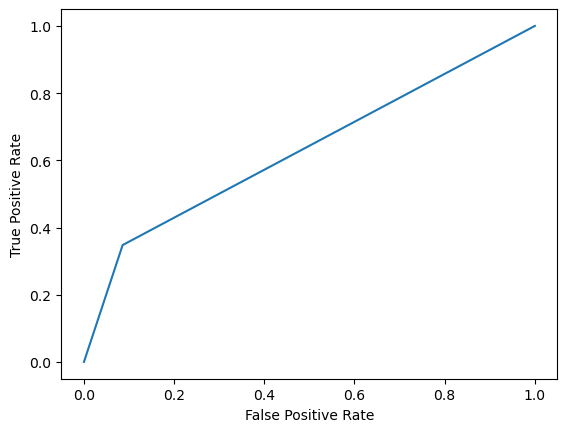

In [95]:
fpr, tpr, _ = roc_curve(y_test, dt_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [97]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.63


## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [101]:
# Predict on the test set
rf_pred = rf_clf.predict(std_scaled_x_test)
rf_pred

array([0, 0, 0, ..., 0, 0, 1])

In [104]:
cm = confusion_matrix(y_test, rf_pred)
cm

array([[973,  41],
       [ 39,  30]])

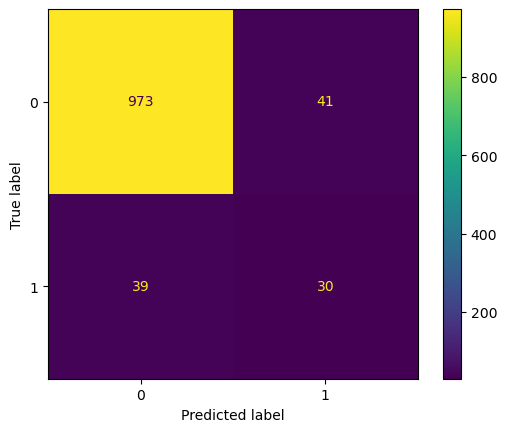

In [106]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [108]:
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.93
Precision: 0.42
F1: 0.43
Recall: 0.43


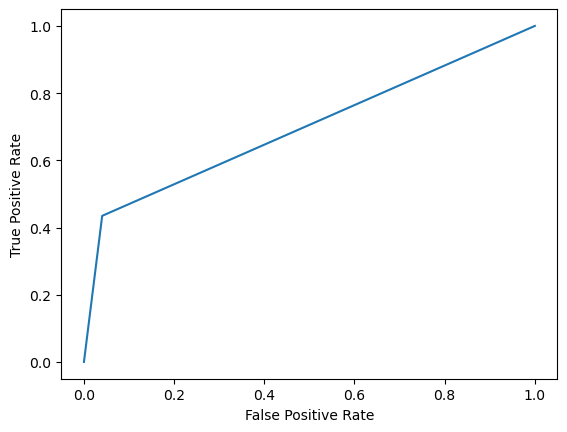

In [110]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [112]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.70


## Hyperparameter Tuning (Random Forest)

In [115]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 50, 100],
    'min_samples_split': [5, 10, 15, 20, 25]
}
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100],
                         'min_samples_split': [5, 10, 15, 20, 25]},
             verbose=2)

In [116]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 5}


In [117]:
best_rf_clf = grid_search.best_estimator_
best_rf_clf

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_split=5)

In [118]:
rf_pred = best_rf_clf.predict(std_scaled_x_test)

accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.93
Precision: 0.42
F1: 0.43
Recall: 0.43


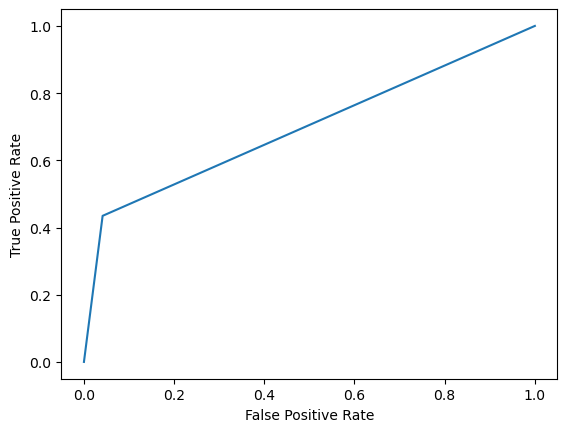

In [119]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [120]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.70


## XGboost

In [122]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [123]:
xgb_pred = xgb_clf.predict(std_scaled_x_test)
xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
cm = confusion_matrix(y_test, xgb_pred)
cm

array([[980,  34],
       [ 45,  24]])

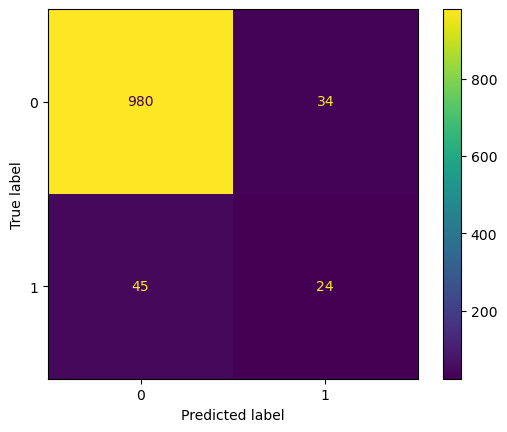

In [125]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [126]:
accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
recall = recall_score(y_test, xgb_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.93
Precision: 0.41
F1: 0.38
Recall: 0.35


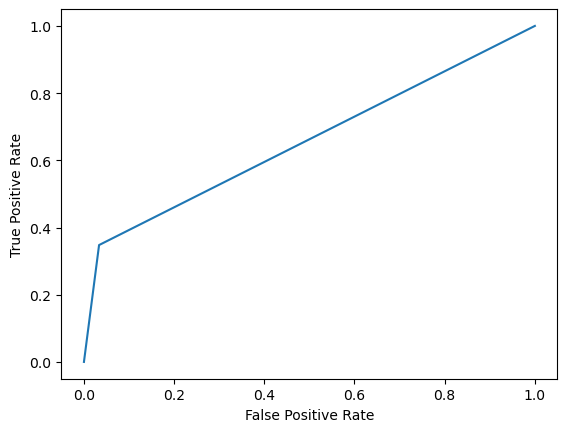

In [127]:
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [128]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.66


## Hyperparameter Tuning (XGboost)

In [130]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid with XGBoost-specific parameters
param_grid = {
    'max_depth': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the XGBClassifier
xgb_clf = xgb.XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END ..criterion=gini, max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END .criterion=gini, max_depth=10, min_samples_split=10; total time=   0.1s
[CV] END .criterion=gini, max_depth=10, min_samples_split=10; total time=   0.0s
[CV] END .criterion=gini, max_depth=10, min_samples_split=15; total time=   0.0s
[CV] END .criterion=gini, max_depth=10, min_samples_split=15; total time=   0.1s
[CV] END .criterion=gini, max_depth=10, min_samples_split=15; total time=   0.1s
[CV] END .criterion=gini, max_depth=10, min_samples_split=15; total time=   0.1s
[CV] END .criterion=gini, max_depth=10, min_samples_split=20; total time=   0.0s
[CV] END ..criterion=gini, max_depth=50, min_samples_split=5; total time=   0.1s
[CV] END .criterion=gini, max_depth=50, min_samples_split=10; total time=   0.0s
[CV] END .criterion=gini, max_depth=50, min_samples_split=15; total time=   0.1s
[CV] END .criterion=gini, max_depth=50, min_s

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [10, 50, 100],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [131]:
best_xgb_clf = grid_search.best_estimator_
best_xgb_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [132]:
xgb_pred = best_xgb_clf.predict(std_scaled_x_test)

accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
recall = recall_score(y_test, xgb_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.94
Precision: 0.49
F1: 0.45
Recall: 0.42


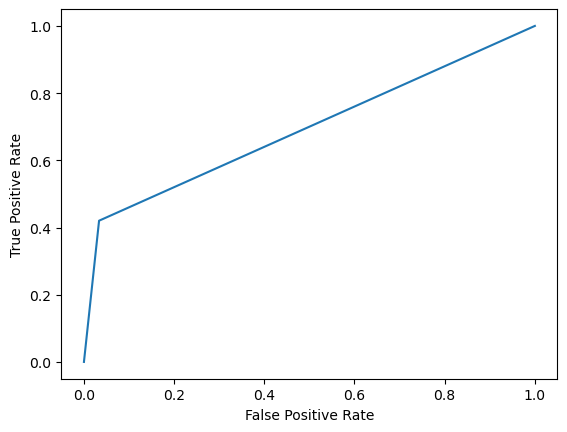

In [285]:
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [289]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.69


## KNN

In [292]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [294]:
knn_pred = knn.predict(std_scaled_x_test)
knn_pred

array([0, 0, 0, ..., 0, 1, 0])

In [296]:
cm = confusion_matrix(y_test, knn_pred)
cm

array([[869, 145],
       [ 28,  41]])

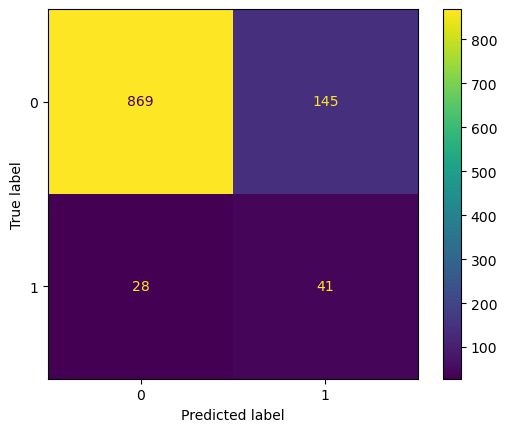

In [298]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [300]:
accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.84
Precision: 0.22
F1: 0.32
Recall: 0.59


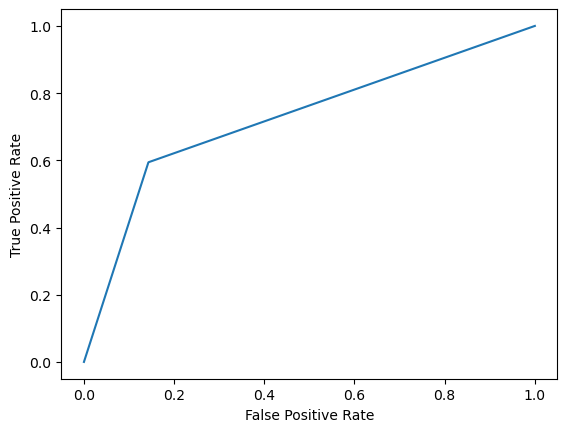

In [302]:
fpr, tpr, _ = roc_curve(y_test, knn_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [304]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.73


## Hyperparameter Tuning (KNN)

In [307]:
# Define parameter grid
param_grid = {
    'n_neighbors': range(1, 50, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 50, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [309]:
# Best parameters and model
print(grid_search.best_params_)
best_knn_clf = grid_search.best_estimator_
best_knn_clf

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [311]:
knn_pred = best_knn_clf.predict(std_scaled_x_test)

accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.89
Precision: 0.28
F1: 0.36
Recall: 0.51


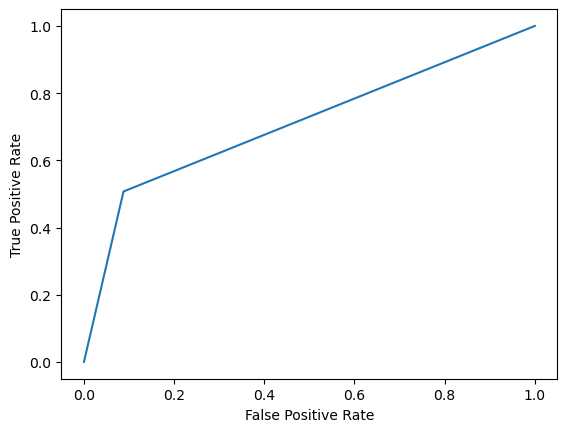

In [313]:
fpr, tpr, _ = roc_curve(y_test, knn_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [315]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.71


## Support Machine Vector (SVM)

In [318]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm = SVC()
svm.fit(x_train_resampled, y_train_resampled)

SVC()

In [320]:
svm_pred = svm.predict(std_scaled_x_test)
svm_pred

array([0, 0, 0, ..., 0, 1, 0])

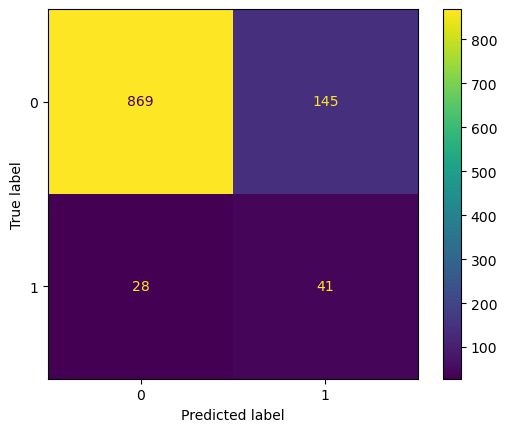

In [322]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [324]:
accuracy = accuracy_score(y_test,svm_pred)
precision = precision_score(y_test, svm_pred)
f1 = f1_score(y_test, svm_pred)
recall = recall_score(y_test, svm_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.86
Precision: 0.25
F1: 0.36
Recall: 0.59


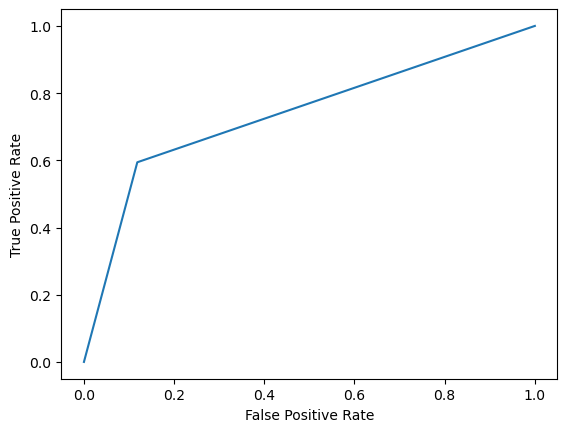

In [326]:
fpr, tpr, _ = roc_curve(y_test, svm_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [328]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.74


## Hyperparameter Tuning (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient for 'rbf' and 'poly'
}

# Initialize SVM classifier
svm = SVC()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

In [ ]:
print(grid_search.best_params_)

In [ ]:
best_svm_clf = grid_search.best_estimator_
best_svm_clf

In [ ]:
svm_pred = best_svm_clf.predict(std_scaled_x_test)

accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred)
f1 = f1_score(y_test, svm_pred)
recall = recall_score(y_test, svm_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

In [ ]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')